In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
Ss = StandardScaler()
label = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.shape

(54808, 14)

In [8]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
train.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [7]:
test.shape

(23490, 13)

In [9]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [13]:
test.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490,23490,22456,23490,23490,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7315,5299,15578,16596,13078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39041.399149,NaN,NaN,NaN,NaN,NaN,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,NaN,NaN,NaN,NaN,NaN,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000


In [14]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [18]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [20]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
test['education'] = test['education'].fillna(test['education'].mode()[0])

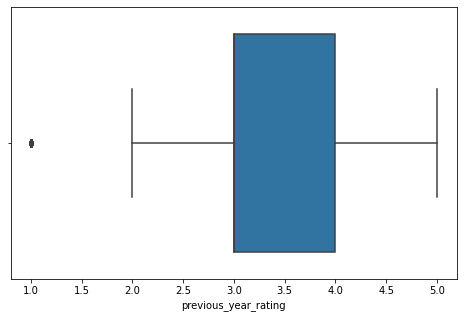

In [21]:
plt.figure(figsize = (8,5))
sns.boxplot('previous_year_rating', data = train)

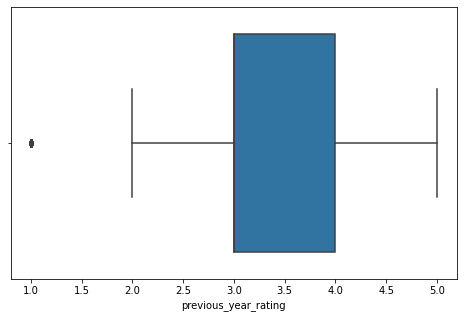

In [22]:
plt.figure(figsize = (8,5))
sns.boxplot('previous_year_rating', data = test)

In [23]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mean())
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mean())

In [27]:
train.isna().sum(),test.isna().sum()

(employee_id             0
 department              0
 region                  0
 education               0
 gender                  0
 recruitment_channel     0
 no_of_trainings         0
 age                     0
 previous_year_rating    0
 length_of_service       0
 KPIs_met >80%           0
 awards_won?             0
 avg_training_score      0
 is_promoted             0
 dtype: int64,
 employee_id             0
 department              0
 region                  0
 education               0
 gender                  0
 recruitment_channel     0
 no_of_trainings         0
 age                     0
 previous_year_rating    0
 length_of_service       0
 KPIs_met >80%           0
 awards_won?             0
 avg_training_score      0
 dtype: int64)

In [29]:
ctrain = train.select_dtypes(object)
ntrain = train.select_dtypes(np.number)

In [30]:
ctrain1 = ctrain.apply(label.fit_transform)

In [36]:
ctest = test.select_dtypes(object)
ntest = test.select_dtypes(np.number)

In [37]:
ctest1 = ctest.apply(label.fit_transform)

In [49]:
final_train = pd.concat([ntrain,ctrain1], axis = 1)

In [50]:
final_test = pd.concat([ntest,ctest1], axis = 1)

In [51]:
final_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel
0,65438,1,35,5.0,8,1,0,49,0,7,31,2,0,2
1,65141,1,30,5.0,4,0,0,60,0,4,14,0,1,0
2,7513,1,34,3.0,7,0,0,50,0,7,10,0,1,2
3,2542,2,39,1.0,10,0,0,50,0,7,15,0,1,0
4,48945,1,45,3.0,2,0,0,73,0,8,18,0,1,0


In [52]:
final_test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel
0,8724,1,24,3.339146,1,1,0,77,8,18,0,1,2
1,74430,1,31,3.000000,5,0,0,51,2,28,0,0,0
2,72255,1,31,1.000000,4,0,0,47,7,4,0,1,0
3,38562,3,31,2.000000,9,0,0,65,5,11,0,0,0
4,64486,1,30,4.000000,7,0,0,61,1,21,0,1,2


In [53]:
X = final_train.drop(['is_promoted'], axis = 1)
y = final_train[['is_promoted']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)

In [85]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)
accuracy_score = (y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
rmse1 = np.sqrt(MSE)
print('MSE', MSE)
print("RMSE", rmse1)

MSE 0.06795440956767596
RMSE 0.2606806658877408


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


log = LogisticRegression()
DT = DecisionTreeRegressor()
KNN = KNeighborsRegressor()
SVM = SVC()
RF = RandomForestRegressor()
NB = GaussianNB()
GB = GradientBoostingClassifier()


algo = [log, DT, KNN, SVM, RF, NB, GB]
algo_names = ['LogisticRegression',
             'DecisionTreeRegressor',
             'KNeighborsRegressor',
             'Support vector Machince',
             'RandomForestRegressor',
             'GaussianNB',
             'GradientBoostingClassifier']


RMSE_list = []

In [73]:
for name in algo:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    rmse1 = np.sqrt(MSE)
    RMSE_list.append(rmse1)

In [91]:
evaluation = pd.DataFrame({'Model': algo_names,
                           'RMSE': RMSE_list})
evaluation

,Model,RMSE
0,LogisticRegression,0.289543
1,DecisionTreeRegressor,0.315621
2,KNeighborsRegressor,0.300483
3,Support vector Machince,0.289543
4,RandomForestRegressor,0.225091
5,GaussianNB,0.286056
6,GradientBoostingClassifier,0.248880


In [87]:
submission = pd.read_csv('submission.csv')
model = RF
model.fit(X, y)
Prediction = model.predict(final_test)
submission['is_promoted'] = Prediction.round()
submission['is_promoted'] = submission['is_promoted'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('submission.csv', index = False)